<a href="https://colab.research.google.com/github/srivarshini-pratapaneni/srivarshini_INFO5731_spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

In [ ]:
#installing NLTK stopwords
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
#installing java
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
#upgrading gensim
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.7MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
#Downloading en module in spicy
import spacy.cli
spacy.cli.download("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [7]:
# Write your code here
!pip install pyLDAvis
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


     |████████████████████████████████| 1.7MB 9.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=3fab70b3c15829ea1dff62914dc26fa49ba5dd9509add545a7f33a9d1f092959
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [19]:
google_articles_titles = pd.read_csv('/content/output.csv', encoding = "ISO-8859-1")
google_articles_titles.head(10)
data = google_articles_titles['title'].tolist()
data_words = []
for line in data:
  data_words.append(gensim.utils.simple_preprocess(str(line), deacc=True))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
after_stopword_removal = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
bigrams = [bigram_mod[doc] for doc in after_stopword_removal]

nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_lemmatization = []
for sent in bigrams:
  doc = nlp(" ".join(sent)) 
  after_lemmatization.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
id2word = corpora.Dictionary(after_lemmatization)
texts = after_lemmatization
corpus = [id2word.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


[[('language', 1), ('natural', 1), ('processing', 1), ('retrieval', 1)]]

In [20]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.271208257120561

Coherence Score:  0.5151241829928082


In [26]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-20 04:30:15--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.04MB/s    in 1.7s    

2021-03-20 04:30:17 (9.04 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [27]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [28]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [33]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('clinical', 0.30303030303030304),
   ('challenge', 0.18181818181818182),
   ('english', 0.18181818181818182),
   ('opportunity', 0.18181818181818182),
   ('automate', 0.12121212121212122),
   ('natural', 0.030303030303030304),
   ('enforcement', 0.0),
   ('infant', 0.0),
   ('architecture', 0.0),
   ('policy', 0.0)]),
 (6,
  [('natural', 0.43243243243243246),
   ('report', 0.2702702702702703),
   ('infant', 0.13513513513513514),
   ('duplicate', 0.10810810810810811),
   ('clinical', 0.02702702702702703),
   ('textual', 0.02702702702702703),
   ('architecture', 0.0),
   ('policy', 0.0),
   ('overview', 0.0),
   ('enforcement', 0.0)]),
 (16,
  [('processing', 1.0),
   ('policy', 0.0),
   ('radiology', 0.0),
   ('overview', 0.0),
   ('biomedicine', 0.0),
   ('architecture', 0.0),
   ('medical', 0.0),
   ('enforcement', 0.0),
   ('english', 0.0),
   ('opportunity', 0.0)]),
 (10,
  [('language', 0.5714285714285714),
   ('natural', 0.42857142857142855),
   ('overview', 0.0),
   ('bi

In [38]:

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=40, step=6)

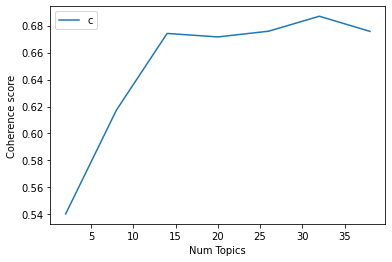

In [39]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [40]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.5404
Num Topics: 8  - Coherence Value: 0.6173
Num Topics: 14  - Coherence Value: 0.6742
Num Topics: 20  - Coherence Value: 0.6716
Num Topics: 26  - Coherence Value: 0.6758
Num Topics: 32  - Coherence Value: 0.6869
Num Topics: 38  - Coherence Value: 0.6757


In [41]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [42]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.152*"processing" + 0.152*"use" + 0.152*"natural" + 0.152*"language" + '
  '0.152*"policy" + 0.152*"enforcement" + 0.002*"automation" + 0.002*"home" + '
  '0.002*"textual" + 0.002*"thing"'),
 (1,
  '0.019*"language" + 0.019*"natural" + 0.019*"processing" + 0.019*"use" + '
  '0.019*"report" + 0.019*"research" + 0.019*"english" + 0.019*"radiology" + '
  '0.019*"technique" + 0.019*"topic"'),
 (2,
  '0.136*"language" + 0.136*"processing" + 0.136*"natural" + 0.135*"radiology" '
  '+ 0.069*"use" + 0.069*"report" + 0.068*"review" + 0.068*"systematic" + '
  '0.068*"infant" + 0.068*"extract"'),
 (3,
  '0.231*"language" + 0.117*"processing" + 0.117*"natural" + 0.116*"clinical" '
  '+ 0.115*"opportunity" + 0.115*"challenge" + 0.115*"english" + 0.002*"use" + '
  '0.002*"system" + 0.002*"automate"'),
 (4,
  '0.021*"natural" + 0.021*"processing" + 0.021*"cancer" + 0.021*"research" + '
  '0.021*"use" + 0.021*"report" + 0.021*"pathology" + 0.021*"language" + '
  '0.019*"textual" + 0.019*"tech

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [45]:
# Write your code here
def prepare_corpus(doc_clean):
    
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix



In [46]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [47]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [48]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [49]:
number_of_topics=7
words=10
model=create_gensim_lsa_model(texts,number_of_topics,words)

[(0, '0.531*"language" + 0.489*"processing" + 0.489*"natural" + 0.353*"use" + 0.151*"report" + 0.115*"system" + 0.071*"research" + 0.063*"pathology" + 0.063*"cancer" + 0.061*"automation"'), (1, '-0.390*"system" + -0.337*"automation" + -0.337*"nlp" + -0.337*"internet" + -0.337*"home" + -0.337*"thing" + -0.337*"control" + 0.223*"report" + 0.134*"research" + 0.113*"pathology"'), (2, '-0.472*"use" + -0.392*"report" + 0.299*"clinical" + 0.269*"language" + 0.228*"base" + -0.218*"pathology" + -0.218*"cancer" + -0.212*"research" + 0.172*"opportunity" + 0.172*"challenge"'), (3, '0.406*"sentiment" + 0.406*"topic" + 0.406*"give" + 0.406*"technique" + -0.267*"report" + -0.253*"research" + 0.221*"extract" + -0.205*"pathology" + -0.205*"cancer" + 0.146*"use"'), (4, '-0.294*"research" + 0.279*"system" + 0.227*"search" + 0.227*"ontological" + 0.227*"method" + -0.221*"clinical" + 0.192*"biomedicine" + 0.192*"overview" + 0.192*"unified" + 0.192*"architecture"'), (5, '0.346*"base" + -0.249*"research" + -

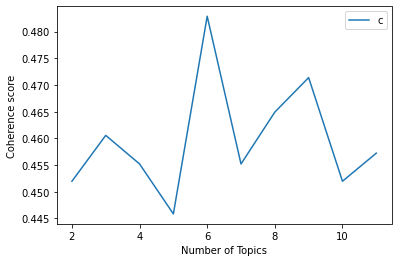

In [50]:
start,stop,step=2,12,1
plot_graph(texts,start,stop,step)

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.I infer LDA is better than LSA as in LDA the coherence score is higher than that of LSA,Higher coherence score for seen in LDA where it is found to be 0.7, where as for the same LSA gave a score of around 0.67.If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This seems like an example for that. LSA algorithm is the simple, easy to understand and implement. It is faster compared to other available algorithms because it involves document term matrix decomposition only. LSA unable to capture the multiple meanings of words.It has certain topics repeating. It is not easier to implement compared to LDA( latent Dirichlet allocation). LSA offers lower accuracy than LDA.